In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# FIFA 19 Best Player Overall By Position
**Hello World !**

So, this is my first ever very simple project about EDA.
Yesterday, I found this interesting dataset about FIFA 19 players (eventho it's already FIFA 22 rn, but I can't find one good dataset for FIFA 22 on kaggle). Then, I decided asking to this data, what is the best player overall in every position?

## Importing dataset and exploring a little bit about players overall 

In [30]:
df = pd.read_csv('/content/data.csv', index_col=0)
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Here I'm plotting the overall each players with histogram and bar plot (just for fun :D). As we can see, players overall in FIFA 19 are follow a normal distribution where the mean is 66.24. As a FIFA players who most of the time play Real Madrid, I'm quite surprised by this mean ('cause if I have a player with the overall 66.24, I will totally sell them).

In the box plot, we can see that the median of players overall is around 66, which is not too far from the mean. There are some outliers too on the upper and bottom whiskers. A player like Messi or Ronaldo or Lewandowski of course are not just regular player (somewhere between 25th and 75th percentile), they definitely is the upper outliers. 

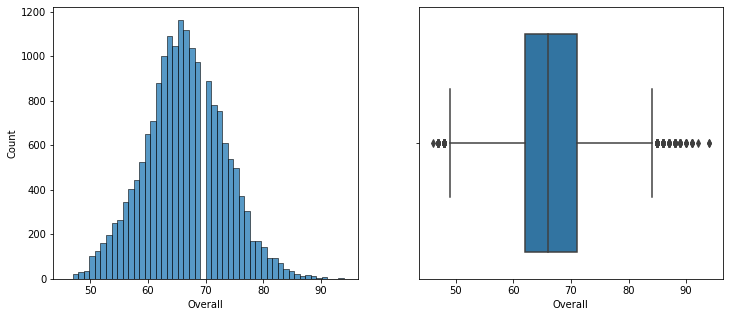

66.23869940132916


In [32]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(df.Overall, bins=50, ax=ax[0])
sns.boxplot(x=df.Overall, ax=ax[1])
plt.show()
print(df.Overall.mean())

## Create "best overall by each position" Dataframe 

Here, I creating a Dataframe which consist of two columns, the positions and the highest overall in the corresponding position.

In [33]:
bestovr_df = df.groupby('Position')['Overall'].max()
pos_ovr_df = {}
pos_ovr_df['Position'] = list(bestovr_df.index.values)
pos_ovr_df['Overall'] = list(bestovr_df.values)
pos_ovr_df = pd.DataFrame(pos_ovr_df)

In [34]:
pos_ovr_df.head()

,Position,Overall
0,CAM,89
1,CB,90
2,CDM,89
3,CF,82
4,CM,86


Next here, I try to subset the initial dataframe, to displaying only the best player in each position

In [35]:
keys = list(pos_ovr_df.columns.values)
i1 = df.set_index(keys).index
i2 = pos_ovr_df.set_index(keys).index
clean_bestovr_df = df[i1.isin(i2)]

clean_bestovr_df is the final dataframe in which contain all the information about the best player in each positions

In [36]:
clean_bestovr_df = clean_bestovr_df.reset_index().drop(columns='index')
clean_bestovr_df = clean_bestovr_df[['ID','Name','Age','Position','Overall','Potential','Nationality','Club','Weight','Height']]
clean_bestovr_df.head()

,ID,Name,Age,Position,Overall,Potential,Nationality,Club,Weight,Height
0,158023,L. Messi,31,RF,94,94,Argentina,FC Barcelona,159lbs,5'7
1,20801,Cristiano Ronaldo,33,ST,94,94,Portugal,Juventus,183lbs,6'2
2,190871,Neymar Jr,26,LW,92,93,Brazil,Paris Saint-Germain,150lbs,5'9
3,193080,De Gea,27,GK,91,93,Spain,Manchester United,168lbs,6'4
4,192985,K. De Bruyne,27,RCM,91,92,Belgium,Manchester City,154lbs,5'11


Nest, I want to create a new column called "Pos", it's a column that are correspond to the "bigger picture" of the Position column (e.g. CB, LB, RB will be "Defender" in Pos Column

In [11]:
clean_bestovr_df['Pos'] = np.where(clean_bestovr_df['Position'] == 'GK', 'GK', 
                                   np.where((clean_bestovr_df['Position'] == 'RCB') |
                                            (clean_bestovr_df['Position'] == 'CB') |
                                            (clean_bestovr_df['Position'] == 'LCB') |
                                            (clean_bestovr_df['Position'] == 'LB') |
                                            (clean_bestovr_df['Position'] == 'RB') |
                                            (clean_bestovr_df['Position'] == 'RWB') |
                                            (clean_bestovr_df['Position'] == 'LWB'), 'Defender',
                                            np.where((clean_bestovr_df['Position'] == 'RF') |
                                                     (clean_bestovr_df['Position'] == 'ST') |
                                                     (clean_bestovr_df['Position'] == 'LW') |
                                                     (clean_bestovr_df['Position'] == 'LF') |
                                                     (clean_bestovr_df['Position'] == 'RS') |
                                                     (clean_bestovr_df['Position'] == 'LS') |
                                                     (clean_bestovr_df['Position'] == 'RW') |
                                                     (clean_bestovr_df['Position'] == 'CF'), 'Forward', 'Midfielder')))

Rearrange clean_bestovr_df columns

In [12]:
clean_bestovr_df = clean_bestovr_df[['ID', 'Name', 'Age', 'Position', 'Pos', 'Overall', 'Potential',
       'Nationality', 'Club', 'Weight', 'Height']]

## Final Result of the Best Player in Each Position Dataframe

In [13]:
clean_bestovr_df

,ID,Name,Age,Position,Pos,Overall,Potential,Nationality,Club,Weight,Height
0,158023,L. Messi,31,RF,Forward,94,94,Argentina,FC Barcelona,159lbs,5'7
1,20801,Cristiano Ronaldo,33,ST,Forward,94,94,Portugal,Juventus,183lbs,6'2
2,190871,Neymar Jr,26,LW,Forward,92,93,Brazil,Paris Saint-Germain,150lbs,5'9
3,193080,De Gea,27,GK,GK,91,93,Spain,Manchester United,168lbs,6'4
4,192985,K. De Bruyne,27,RCM,Midfielder,91,92,Belgium,Manchester City,154lbs,5'11
5,183277,E. Hazard,27,LF,Forward,91,91,Belgium,Chelsea,163lbs,5'8
6,177003,L. Modrić,32,RCM,Midfielder,91,91,Croatia,Real Madrid,146lbs,5'8
7,176580,L. Suárez,31,RS,Forward,91,91,Uruguay,FC Barcelona,190lbs,6'0
8,155862,Sergio Ramos,32,RCB,Defender,91,91,Spain,Real Madrid,181lbs,6'0
9,182521,T. Kroos,28,LCM,Midfielder,90,90,Germany,Real Madrid,168lbs,6'0


By now, actually I already answered my question. Now I know that the best LF is Eden Haxard, RF is Messi, etc. But I'm curious of how these best players overall average and maximum values, on each "Pos" (what is the average Defender Overall, what is the maximum Forward overall, etc.). So I decided to make a bar and box plot for the average and maximum of each Pos. Then I also made a box plot to know how these all best players overall values spread.

In [14]:
avg_ovr_by_pos = clean_bestovr_df.groupby('Pos')['Overall'].mean()
max_ovr_by_pos = clean_bestovr_df.groupby('Pos')['Overall'].max()

In [15]:
avg_max_df = pd.DataFrame({'Position': avg_ovr_by_pos.index.values,
                           'Overall Mean': avg_ovr_by_pos.values,
                           'Overall Max': max_ovr_by_pos.values})
avg_max_df = pd.melt(avg_max_df, id_vars='Position', var_name='Estimator', value_name='Values')
avg_max_df

,Position,Estimator,Values
0,Defender,Overall Mean,84.888889
1,Forward,Overall Mean,88.700000
2,GK,Overall Mean,91.000000
3,Midfielder,Overall Mean,88.428571
4,Defender,Overall Max,91.000000
5,Forward,Overall Max,94.000000
6,GK,Overall Max,91.000000
7,Midfielder,Overall Max,91.000000


This is the bar plot

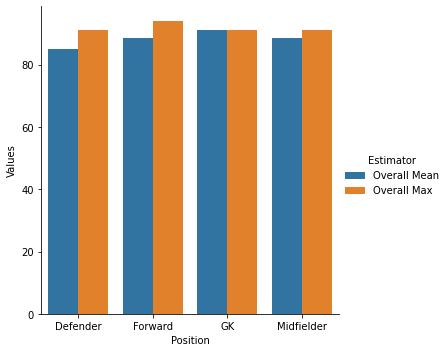

In [16]:
sns.catplot(x='Position', y='Values', hue='Estimator', data=avg_max_df, kind='bar')

And this is the box plot.

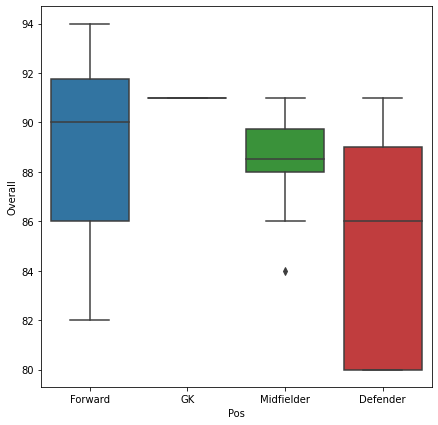

In [17]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(x='Pos', y='Overall', data=clean_bestovr_df, ax=ax)
plt.show()

As we can see there are no box in GK, this is because there is only one best GK in FIFA 19, that is David De Gea

In [18]:
clean_bestovr_df[clean_bestovr_df.Pos == 'GK']

,ID,Name,Age,Position,Pos,Overall,Potential,Nationality,Club,Weight,Height
3,193080,De Gea,27,GK,GK,91,93,Spain,Manchester United,168lbs,6'4


We can see too that there is an outlier in Midfielder, it is Juan Cuadrado

In [19]:
clean_bestovr_df[(clean_bestovr_df.Pos == 'Midfielder') & (clean_bestovr_df.Overall < 86)]

,ID,Name,Age,Position,Pos,Overall,Potential,Nationality,Club,Weight,Height
27,193082,J. Cuadrado,30,RAM,Midfielder,84,84,Colombia,Juventus,159lbs,5'10


Last here, I'm curious why there the box in Defender are so big insted of using whisker in the bottom of the box. It turns out that there are 4 players with the same overall as RWB and LWB, and they all had the minimum overall of these defenders

In [20]:
clean_bestovr_df[clean_bestovr_df.Pos == 'Defender']

,ID,Name,Age,Position,Pos,Overall,Potential,Nationality,Club,Weight,Height
8,155862,Sergio Ramos,32,RCB,Defender,91,91,Spain,Real Madrid,181lbs,6'0
10,182493,D. Godín,32,CB,Defender,90,90,Uruguay,Atlético Madrid,172lbs,6'2
16,138956,G. Chiellini,33,LCB,Defender,89,89,Italy,Juventus,187lbs,6'2
21,176676,Marcelo,30,LB,Defender,88,88,Brazil,Real Madrid,176lbs,5'9
26,184432,Azpilicueta,28,RB,Defender,86,86,Spain,Chelsea,168lbs,5'10
30,207862,M. Ginter,24,RWB,Defender,80,82,Germany,Borussia Mönchengladbach,183lbs,6'2
31,203605,P. Kadeřábek,26,RWB,Defender,80,81,Czech Republic,TSG 1899 Hoffenheim,179lbs,6'0
32,200536,N. Schulz,25,LWB,Defender,80,81,Germany,TSG 1899 Hoffenheim,172lbs,5'11
33,180216,S. Coleman,29,RWB,Defender,80,80,Republic of Ireland,Everton,148lbs,5'10


This last box plot is to know how spread is these best players. It turns out that there are no outliers, and the median of the best players overall is arround 88.2.

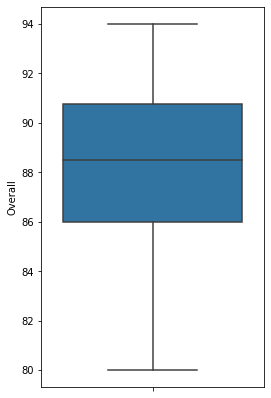

In [21]:
fig, ax = plt.subplots(figsize=(4,7))
sns.boxplot(y='Overall', data=clean_bestovr_df, ax=ax)
plt.show()

Lastly I save the clean_bestovr_df as csv file.

In [22]:
clean_bestovr_df.to_csv('bestovr_by_pos.csv')
print('Success!')

Success!


## That's all for my first very simple project of exploring FIFA 19 player datasets. THANK YOU